**Author:** Deepa Anjanamurthy

**Project**: Exchange Explorer (Capstone - Data Science)

### **Table of Contents**

- [**1. Introduction**](#intro)
    * [**Data Dictionary**](#dd)
    
- [**2. Setup**](#setup)
    * [**Importing Libraries**](#libimports)
    
- [**3. Data Cleaning and EDA**](#EDA)
    * [**Visualizations**](#visuals)
    * [**Central tendancy of variables**](#Central)
    * [**Correlation Matrix**](#corr)
    * [**Log Transformation plots**](#LogTransform)
    * [**Box-Cox Transformation plots**](#BoxCox)
    * [**Residuals plots**](#residuals)

- [**5. Baseline Model**](#baseline)
    * [**Polynomial Regression**](#polynomial)
    
- [**6. Non-linear model**](#nonlinear)
    * [****](#)
    * [****](#)
    



<a class="anchor" id="intro"></a>
### Introduction to Exchange Explorer!

In this project, **"Exchange Explorer: Predictive Analytics for USD Fluctuations,"** we dive into the fascinating world of currency exchange rates, focusing on the US Dollar (USD) — a key player in global finance. The USD's influence stretches far and wide, affecting everything from international trade to personal investment decisions. Our goal is to sift through historical exchange rate data, uncover patterns, and predict future movements using the machine learning techniques. 

This isn't just about crunching numbers; it's about providing valuable insights for investors, financial analysts, and policymakers to make informed decisions in a complex market. Through a careful blend of analysis and technology, "Exchange Explorer" aims to shed light on the dynamics of forex markets, making them more understandable and navigable for everyone involved.



<a class="anchor" id="dd"></a>

### Data Dictionary

This dataset offers a comprehensive view of daily currency exchange rates, from 2008 to 2023. Currency rates can be affected by various factors, including interest rates, inflation, political instability, economic performance, and global market developments. Understanding these rates over time can provide valuable insights into economic trends, market behaviors, and the impacts of global events on currency values.

The currency pairs included in this dataset are:
- USD to INR (INR=X)
- USD to JPY (JPY=X)
- USD to EUR (EUR=X)
- USD to GBP (GBP=X)
- USD to AUD (AUD=X)
- USD to CAD (CAD=X)
- USD to CHF (CHF=X)
- USD to CNY (CNY=X)
- USD to HKD (HKD=X)
- USD to SGD (SGD=X)

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Data Type</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
 </tr>
  <tr>
    <td style="text-align: left"> <code>Ticker</code> </td>
    <td style="text-align: left">str</td>
    <td style="text-align: left">The currency pair being represented.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Date</code></td>
    <td style="text-align: left">str</td>
    <td style="text-align: left">The date in YYYY-MM-DD format.</td>
  </tr>
    
  <tr>
    <td style="text-align: left"> <code>Open</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The opening exchange rate of the day.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>High</code></td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The highest exchange rate of the day.</td>
  </tr>
    
  <tr>
    <td style="text-align: left"> <code>Low</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The lowest exchange rate of the day.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Close</code></td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The closing exchange rate of the day.</td>
  </tr>

  <tr>
    <td style="text-align: left"> <code>Adj Close</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The adjusted closing exchange rate of the day.</td>
  </tr>
  
  <tr>
    <td style="text-align: left"> <code>Volume</code> </td>
    <td style="text-align: left">float</td>
    <td style="text-align: left">The volume of the currency traded on that day.</td>
  </tr>

<a class="anchor" id="setup"></a>

### Setup

<a class="anchor" id="libimports"></a>

Library imports necessary for running the analysis 

In [114]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To get rid of logistic regression default solver warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To build a pipeline
from sklearn.pipeline import Pipeline

# To try dimensionality reduction
from sklearn.decomposition import PCA

# To do a cross-validated grid search
from sklearn.model_selection import GridSearchCV


<a class="anchor" id="EDA"></a>
### Data Cleaning and EDA

The dataset contains 15 years of data separated by the year - **2008 to 2023**. The data spans from Aug 2008 to July 2023. These separate files have been combined into one csv file  for ease and is being used for analysis.

In [115]:
# Load the data
df = pd.read_csv('combined_usd_exchange_rates.csv')

In [116]:
# Check if the dataframe data
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,GBP=X,2008-08-01,0.50441,0.5068,0.50396,0.50651,0.50651,0.0
1,AUD=X,2008-08-01,1.06430,1.0765,1.06390,1.07270,1.07270,0.0
2,CAD=X,2008-08-01,1.02340,1.0294,1.02290,1.02460,1.02460,0.0
3,CHF=X,2008-08-01,1.04800,1.0512,1.04640,1.05040,1.05040,0.0
4,CNY=X,2008-08-01,6.83600,6.8554,6.82100,6.84700,6.84700,0.0


In [117]:
# Check the shape - no. of rows and columns in the dataframe
df.shape

(38982, 8)

In [118]:
# Check the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     38982 non-null  object 
 1   Date       38982 non-null  object 
 2   Open       38982 non-null  float64
 3   High       38982 non-null  float64
 4   Low        38982 non-null  float64
 5   Close      38982 non-null  float64
 6   Adj Close  38982 non-null  float64
 7   Volume     38982 non-null  float64
dtypes: float64(6), object(2)
memory usage: 2.4+ MB


The dataset contains **38982 rows and 8 columns**. Each row in the dataset represents a single day and includes the following columns:

- Ticker: The currency pair being represented. For e.g.: 'GBP=X' represents the ticker symbol of **USD to GBP** rate. There are **10** such pairs represented in the dataset.
- Date: The date in YYYY-MM-DD format.
- Open: The opening exchange rate of the day.
- High: The highest exchange rate of the day.
- Low: The lowest exchange rate of the day.
- Close: The closing exchange rate of the day.
- Adj Close: The adjusted closing exchange rate of the day.
- Volume: The volume of the currency traded on that day.

In [119]:
# Get a sample of rows in the DF
df.sample(15)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
38220,HKD=X,2023-04-13,7.847210,7.849940,7.847160,7.847210,7.847210,0.0
16423,INR=X,2014-12-02,61.903000,62.029999,61.790001,61.948002,61.948002,0.0
12578,CAD=X,2013-06-10,1.021500,1.021750,1.016850,1.021470,1.021470,0.0
7686,CHF=X,2011-07-25,0.813400,0.815300,0.802290,0.813500,0.813500,0.0
27169,CHF=X,2019-01-16,0.987360,0.990830,0.987100,0.987470,0.987470,0.0
7504,AUD=X,2011-06-29,0.948930,0.950380,0.936420,0.949040,0.949040,0.0
31148,CHF=X,2020-07-28,0.919400,0.922710,0.915530,0.919480,0.919480,0.0
32731,SGD=X,2021-03-05,1.337300,1.344250,1.336600,1.337580,1.337580,0.0
6850,JPY=X,2011-03-29,81.746002,82.449997,81.537003,81.760002,81.760002,0.0
24982,SGD=X,2018-03-15,1.308830,1.312200,1.308100,1.308700,1.308700,0.0


In [120]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


On inspecting the columns datatypes, Ticker and Date are object datatypes and the rest columns are float datatypes.

The column Date is currently an object type. In order to use the column in a time series analysis, converting this column to **datetime** data type would be necessary.

In [121]:
df['Date'] = pd.to_datetime(df['Date'])

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     38982 non-null  object        
 1   Date       38982 non-null  datetime64[ns]
 2   Open       38982 non-null  float64       
 3   High       38982 non-null  float64       
 4   Low        38982 non-null  float64       
 5   Close      38982 non-null  float64       
 6   Adj Close  38982 non-null  float64       
 7   Volume     38982 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.4+ MB


In [123]:
# Check unique values in the 'Volume' column
unique_volume_values = df['Volume'].unique()

# Display the unique values
print(unique_volume_values)

[0.]


In [124]:
# Drop the 'Volume' column if it's not needed
df = df.drop('Volume', axis=1)

The Volume column only has the unique value of 0, and provides no value to the analysis. Hence, this column is unnecessary as there's no variability that can be observed using this variable. Dropped this column for future analysis.

<a class="anchor" id="visuals"></a>

#### Visualizations

Plotting the frequency histograms

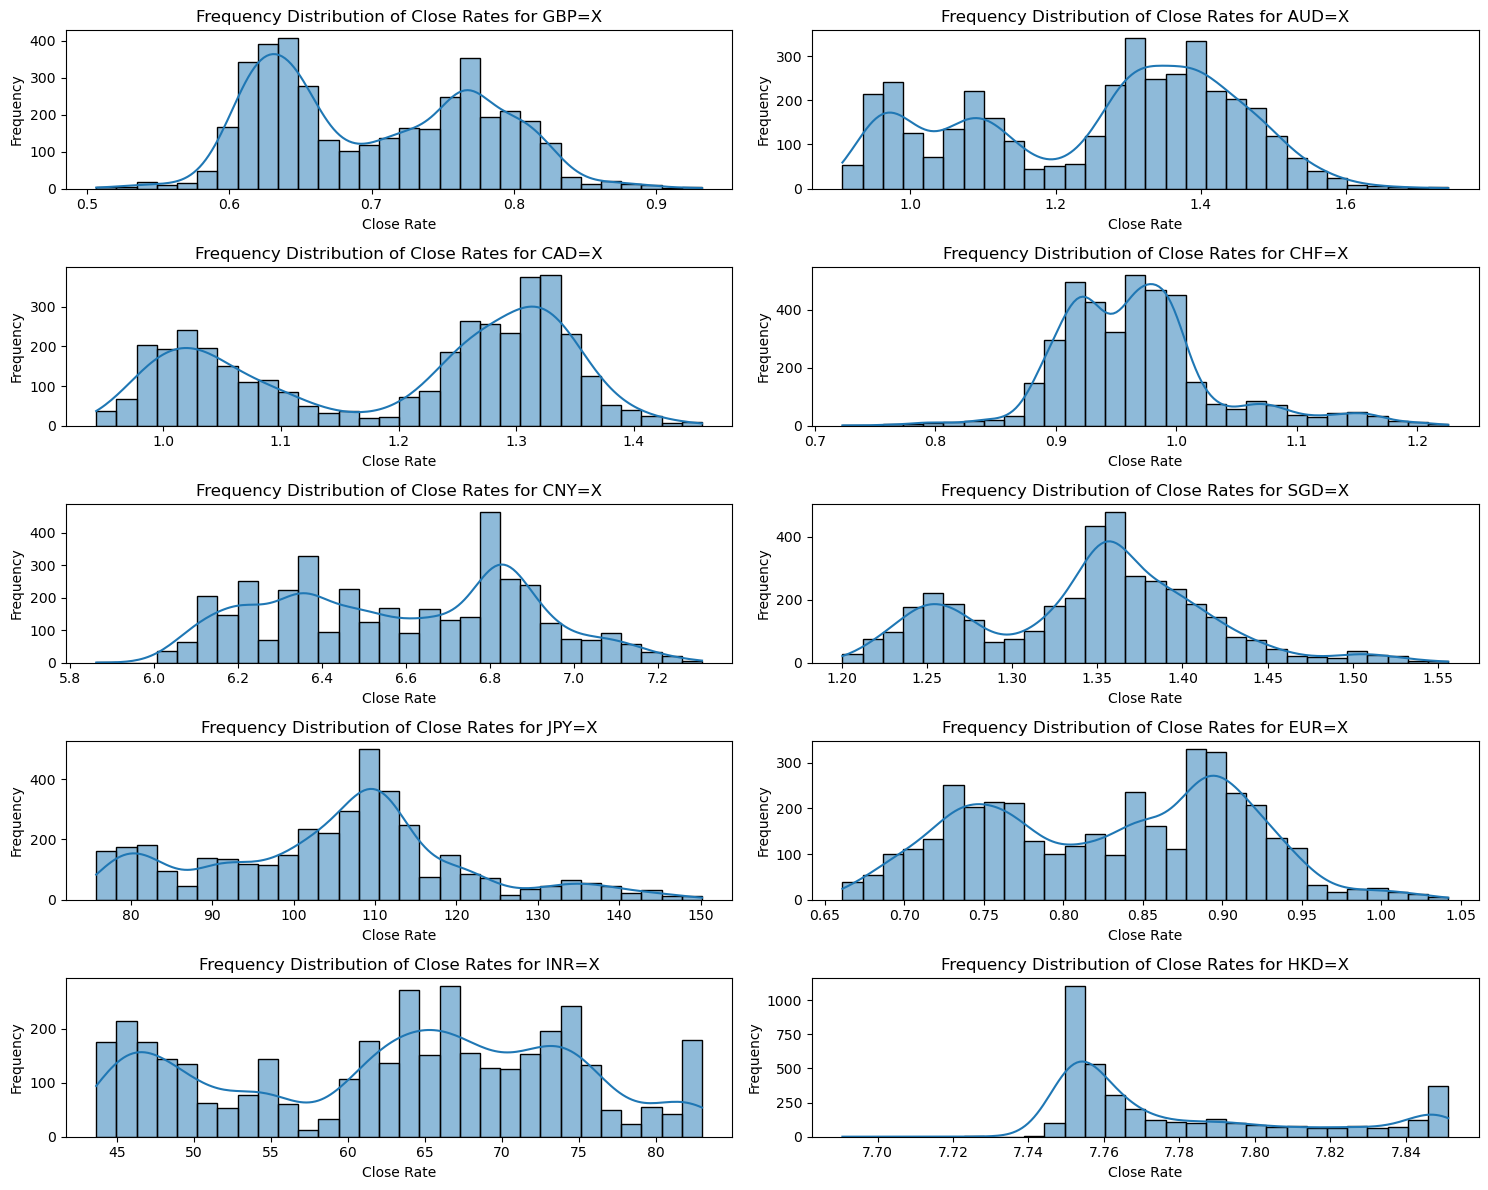

In [125]:
# Unique currency tickers
tickers = df['Ticker'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Number of rows for subplot, adjust based on the number of tickers
n_rows = len(tickers) // 2 + len(tickers) % 2

for i, ticker in enumerate(tickers, 1):
    # Filter the DataFrame for each ticker
    ticker_data = df[df['Ticker'] == ticker]
    
    # Create a subplot for each ticker
    plt.subplot(n_rows, 2, i)
    sns.histplot(ticker_data['Close'], kde=True, bins=30)
    plt.title(f'Frequency Distribution of Close Rates for {ticker}')
    plt.xlabel('Close Rate')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<a class="anchor" id="Central"></a>
#### Central tendency of variables

Exploring measures of central tendency (**mean**) of the variables

In [126]:
# Group the data by 'Ticker' and calculate mean for each currency pair
central_tendency_by_ticker = df.groupby('Ticker').agg({
#     'Open': ['mean', 'median', lambda x: x.mode().iloc[0]],
    'Open': ['mean'],
    'Close': ['mean'],
    'Adj Close': ['mean'],
    'High': ['mean'],
    'Low': ['mean']  
    
})

# Display the mean for each currency pair
central_tendency_by_ticker

,Open,Close,Adj Close,High,Low
,mean,mean,mean,mean,mean
Ticker,,,,,
AUD=X,1.257908,1.258001,1.258001,1.264428,1.251644
CAD=X,1.198423,1.198412,1.198412,1.202731,1.194271
CHF=X,0.967206,0.967181,0.967181,0.970989,0.963413
CNY=X,6.587017,6.587329,6.587329,6.596036,6.576680
EUR=X,0.828949,0.828978,0.828978,0.832197,0.825921
GBP=X,0.702123,0.702135,0.702135,0.705247,0.699425
HKD=X,7.780899,7.780890,7.780890,7.782881,7.778799
INR=X,62.942183,62.946545,62.946545,63.170480,62.734809


<a class="anchor" id="corr"></a>
#### Correlation Matrix

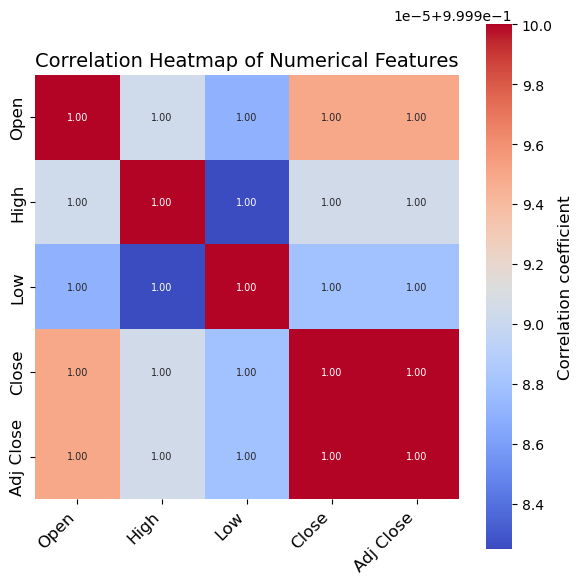

In [127]:
# Select numerical features for the correlation matrix
corr = df.select_dtypes(include=['int64', 'float64']).corr()

# Plot the heatmap
plt.figure(figsize=(6, 6))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 7},
                 square=True, cbar_kws={'label': 'Correlation coefficient'})  
plt.title('Correlation Heatmap of Numerical Features', size=14)
plt.xticks(rotation=45, ha="right", size=12)
plt.yticks(size=12)

# Color bar (cbar) size and label
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Correlation coefficient', size=12) 

plt.tight_layout()
plt.show()

From the heatmap, it is clear that all the numerical variables in the dataset are highly related to each other, as they carry information of the rates throughout a single day. The primary target variable in this analysis will focus on one variable, namely, **'Close'**.

At the stage of feature engineering, it will be decided whether dropping one or more varaibles would be beneficial for the analysis.

<a class="anchor" id="LogTransform"></a>

#### Log Transformation plots

Re-plotting log transformed frequency distributions:

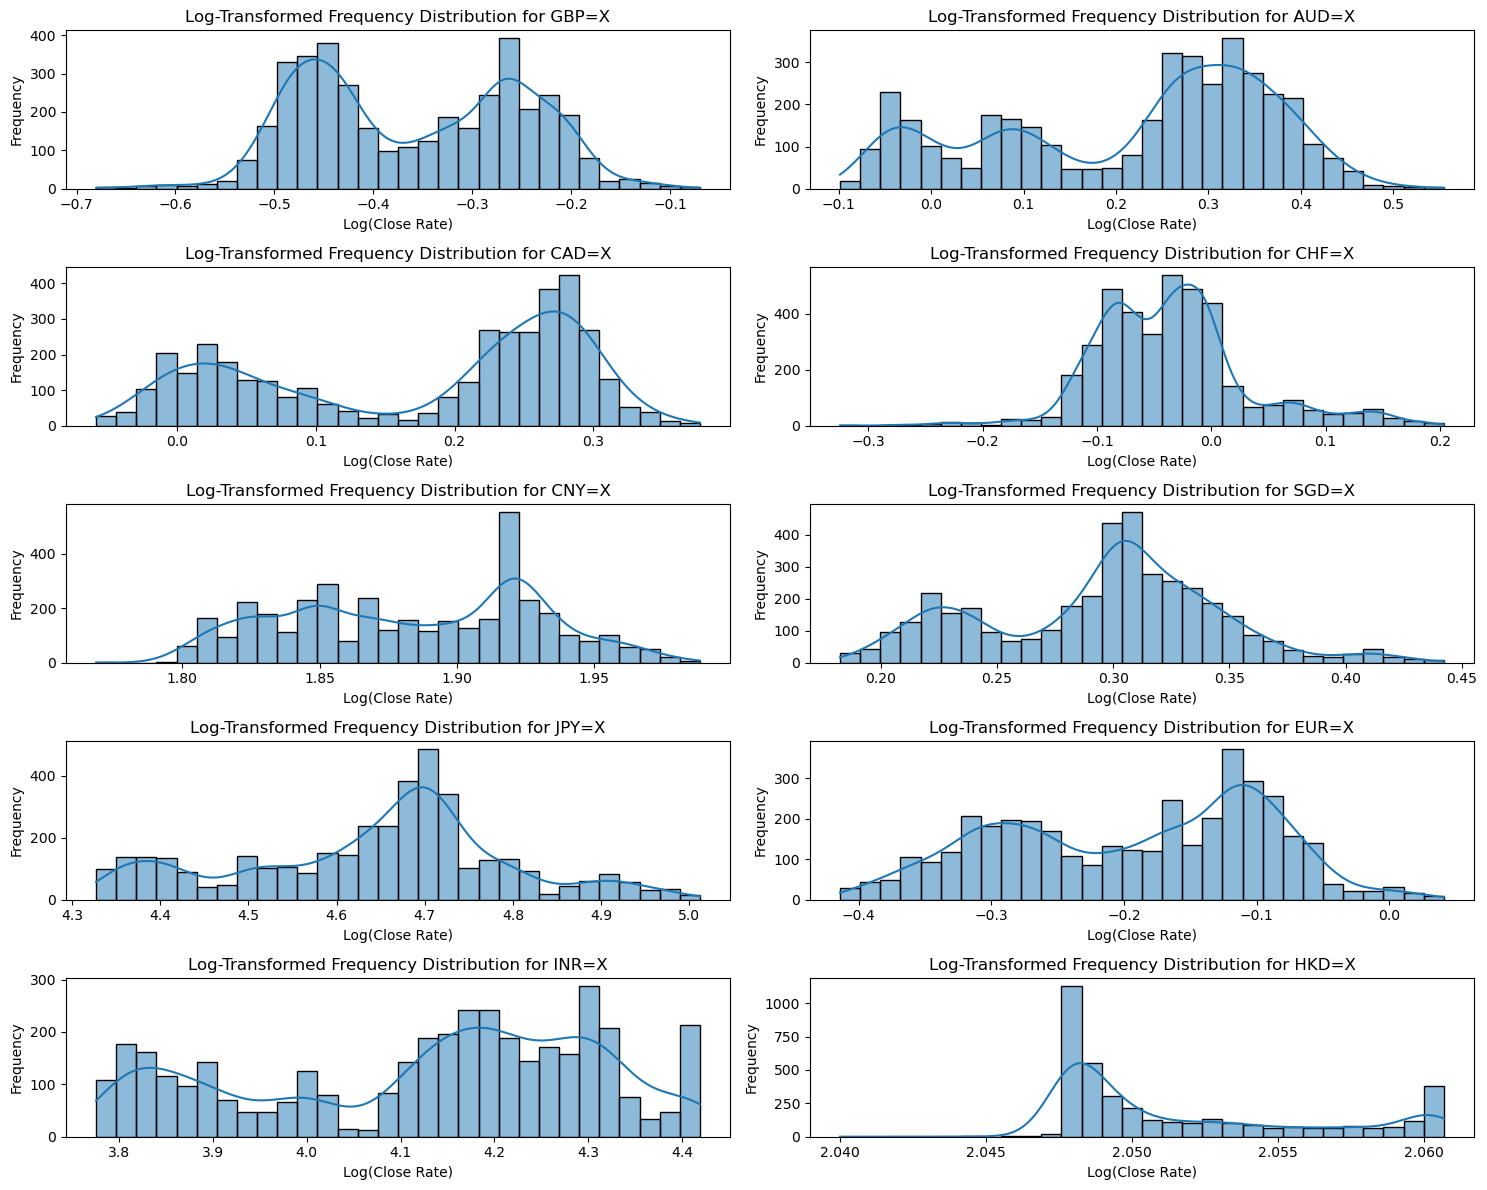

In [128]:
# Unique currency tickers
tickers = df['Ticker'].unique()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Number of rows for subplot, adjust based on the number of tickers
n_rows = len(tickers) // 2 + len(tickers) % 2

for i, ticker in enumerate(tickers, 1):
    # Filter the DataFrame for each ticker directly within the plotting command
    # This avoids the need to modify the subset and potentially trigger the warning
    plt.subplot(n_rows, 2, i)
    sns.histplot(np.log(df[df['Ticker'] == ticker]['Close'] + 1e-9), kde=True, bins=30)
    plt.title(f'Log-Transformed Frequency Distribution for {ticker}')
    plt.xlabel('Log(Close Rate)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Log transforming the data does not result in a substantial change in distribution and it remains binomial. For this reason, attempting to run a box-cox transformation.

<a class="anchor" id="BoxCox"></a>
#### Box-Cox Transformed plots

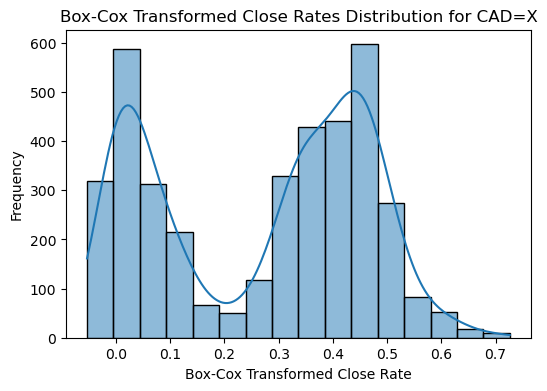

In [129]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for the 'CAD=X' ticker
cad_data = df[df['Ticker'] == 'CAD=X'].copy()

# Ensure all 'Close' values are positive for Box-Cox transformation
cad_data['Close'] = cad_data['Close'] + 1e-9  # Adjust as needed to ensure positivity

# Applying Box-Cox transformation specifically to 'CAD=X' Close values
cad_data['BoxCox_Close'], fitted_lambda = stats.boxcox(cad_data['Close'])

# plot the transformed 'BoxCox_Close' to check for normality
plt.figure(figsize=(6, 4))
sns.histplot(cad_data['BoxCox_Close'], kde=True)
plt.title('Box-Cox Transformed Close Rates Distribution for CAD=X')
plt.xlabel('Box-Cox Transformed Close Rate')
plt.ylabel('Frequency')
plt.show()

Close rates do not appear normally distributed, and running a linear regression model appears unsuitable for this dataset. To continue EDA, Time Series will be examined for an explanation for 

<a class="anchor" id="residuals"></a>
#### Plotting resuiduals

Plotting Residuals to check if running a linear regression baseline would be suitable for the dataset.

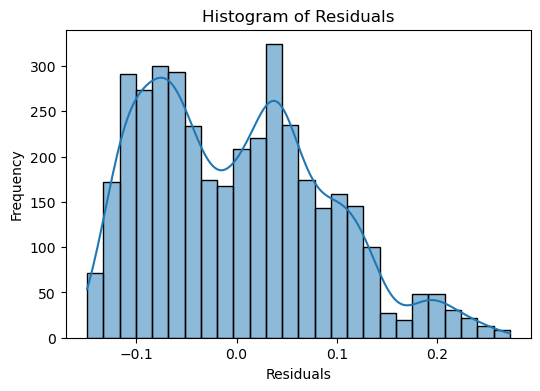

Statistics=0.963, p-value=0.000


In [130]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Convert 'Date' to a numeric sequence
df['Time'] = range(len(df))

# Selecting data for a specific ticker, if needed
df_specific = df[df['Ticker'] == 'CAD=X']

X = sm.add_constant(df_specific['Time'])  # Independent variable
y = df_specific['Close']  # Dependent variable

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Extract and analyze the residuals
residuals = model.resid

# Plotting residuals for visual inspection
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print(f'Statistics={stat:.3f}, p-value={p_value:.3f}')

Running the Shapiro Wilk's test on the residuals resulted in:
- test statistic: 0.963 
- p-value: 0

Although, test statistic score is very close to 1 suggesting that the residuals are somewhat close to normality, the very low p-value leads us to reject the null hypothesis of normality, which violates linear regression assumptions. 

<a class="anchor" id="baseline"></a>
### Baseline Model

<a class="anchor" id="polynomial"></a>
#### Polynomial Regression

First, as the focus is one currency pair, CAD=X, this Ticker needs to be filtered.

In [131]:
cad_df = df[df['Ticker'] == 'CAD=X']

In [132]:
cad_daily_ffill = cad_df.set_index('Date').asfreq('D').ffill()

In [133]:
import statsmodels.api as sm

# Creating a numeric time variable
# Example: days since start of series
time_numeric = (cad_daily_ffill.index - cad_daily_ffill.index[0]).days #using forward filled data for missing weekend rates

# Creating polynomial features (creating 2 degrees for a 2nd degree polynomial)
X = pd.DataFrame({
    'Time': time_numeric,
    'Time^2': time_numeric**2,
    
})

# Adding a constant for the intercept
X = sm.add_constant(X)

# Your response variable
y = cad_daily_ffill['Close']

In [134]:
X.index = cad_daily_ffill.index

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     3799.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:49:55   Log-Likelihood:                 5512.8
No. Observations:                5475   AIC:                        -1.102e+04
Df Residuals:                    5472   BIC:                        -1.100e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0045      0.004    280.270      0.0

<a class="anchor" id="Mmetrics"></a>
#### Model Evaluation Metrics

To summarize the findings of the baseline model, it's essential to look at the evaluation metrics. Here is an outline of the important evaluation metrics of this model:

- ${R}^{2}$ (**Model Explanatory Power**) for this model is **0.581** which is a moderate level of explanatory power of the model.
- F-statistic of **3799** and a p-value of **0.000** indicate that the model is statistically significant. This suggest that this model with time and its squares as predictors explain the variation with **Close** rates.
- Coefficients for both **Time** and **Time^2** are siginifcant with p-values of 0.000 indicating that this polynomial regression model was more suitable compared to a linear model.
- The possible presence of multicollinearity among the predictor variables is expected. All predictor variables are related to each other as they all describe daily exchange rates.

This model provides a solid baseline model with 58% accuracy which could be improved with further analysis or explore the relationship between the dependent and independant variables using complex model in the next stages

<a class="anchor" id="fitvisual"></a>
#### Visualization of the model fit

In order to visually inspect the fit of the baseline model, a plot will be the best choice.

In [135]:
predictions = model.predict(X)

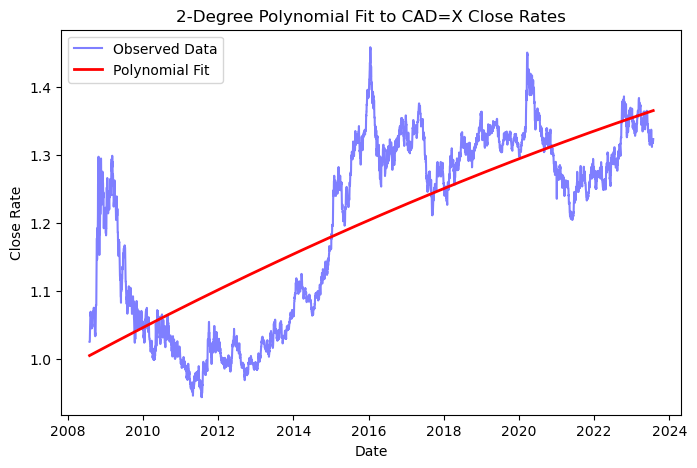

In [136]:
plt.figure(figsize=(8, 5))

# Plotting the observed data points
plt.plot(cad_daily_ffill.index, cad_daily_ffill['Close'], '-', label='Observed Data', color='blue', alpha=0.5)


# Plotting the model predictions
plt.plot(cad_daily_ffill.index, predictions, color='red', label='Polynomial Fit', linewidth=2)

plt.title('2-Degree Polynomial Fit to CAD=X Close Rates')
plt.xlabel('Date')
plt.ylabel('Close Rate')
plt.legend()

plt.show()

The 2-degree polynomial fit line in red represents the best fit line of the model where the observed "Close" rates for the currency pair 'CAD=X' from 2008 through 2023 represented by the blue dots.

There is considerable volatility in the observed data that the model does not capture, explaining the moderate accuracy of 58%. This also indicates that the simplicity of the 2nd degree polynomial model is unable to explain fully the variability of the Close rates.

**Model Limitations** While this model captures the broad directional movement, it does not conform to the sharp rises and falls of the Close rates, which is typical for complex financial data. More complex models or additional features would be needed to capture these finer details and residual error.

### Train Test split for baseline polynomial model for predictions

In the previous step, the model was fit without a train-test split. We will discard this line of thinking and split the dataset into train and test. Followed by fitting the model to the training data. 

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#### Fit the model on train data

In [138]:
#  retaining 'time' -> predictor 
time = np.arange(len(cad_daily_ffill))

# Assigning target variable is 'Close'
y = cad_daily_ffill['Close']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(time.reshape(-1,1), y, test_size=0.2, shuffle=False)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [139]:
# Add a constant to the model (for the intercept)
X_train_poly_sm = sm.add_constant(X_train_poly)

# Fit the model
model = sm.OLS(y_train, X_train_poly_sm).fit()

In [140]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     4228.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:49:56   Log-Likelihood:                 4714.0
No. Observations:                4380   AIC:                            -9422.
Df Residuals:                    4377   BIC:                            -9403.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0675      0.004    285.553      0.0

In [141]:
# Predict
# Add the constant here
X_test_poly_sm = sm.add_constant(X_test_poly)  

predictions = model.predict(X_test_poly_sm)

# Calculate RMSE or any other desired metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, predictions)

mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

rmse = np.sqrt(mse)


print(f"Test RMSE: {rmse}")
print(f"Test MAPE: {mape}%")

Test RMSE: 0.2739692647264202
Test MAPE: 20.68587562942186%


#### Visualize the fit of the model

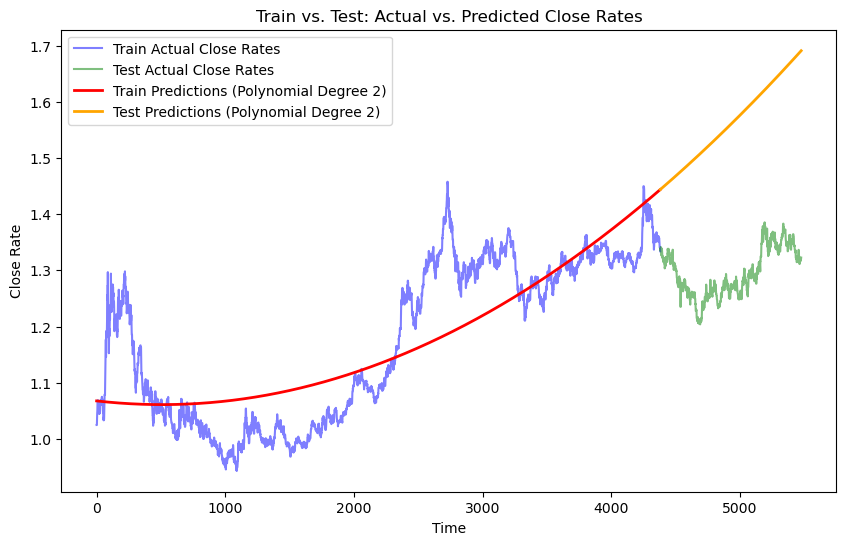

In [142]:
import matplotlib.pyplot as plt

# Fit the polynomial regression model using statsmodels on the training set
X_train_poly_sm = sm.add_constant(X_train_poly)  # Add a constant for the intercept
model_poly = sm.OLS(y_train, X_train_poly_sm).fit()  # Fit the model

# Generate predictions for both training and testing sets
predictions_train = model_poly.predict(X_train_poly_sm)

# For testing set, also add a constant for the intercept
X_test_poly_sm = sm.add_constant(X_test_poly)  
predictions_test = model_poly.predict(X_test_poly_sm)

# Plot the actual Close rates for training data in one color (e.g., blue)
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, '-', label='Train Actual Close Rates', color='blue', alpha=0.5)

# Plot the actual Close rates for testing data in another color (e.g., green)
plt.plot(X_test, y_test, '-', label='Test Actual Close Rates', color='green', alpha=0.5)

# Plot the model's predictions for training data
# plt.plot(X_train, predictions_train, 's', label='Train Predictions (Polynomial Degree 2)', color='red', alpha=0.5)
plt.plot(X_train, predictions_train, label='Train Predictions (Polynomial Degree 2)', color='red', linewidth=2)

# Plot the model's predictions for testing data
# plt.plot(X_test, predictions_test, 's', label='Test Predictions (Polynomial Degree 2)', color='orange', alpha=0.5)
plt.plot(X_test, predictions_test, label='Test Predictions (Polynomial Degree 2)', color='orange', linewidth=2)

plt.title('Train vs. Test: Actual vs. Predicted Close Rates')
plt.xlabel('Time')
plt.ylabel('Close Rate')
plt.legend()
plt.show()


### Iteration 2 - polynomial features of degree 3

In [143]:
# Convert 'time_numeric' to a numpy array and then reshape it for PolynomialFeatures
time_numeric_array = np.array(time_numeric).reshape(-1, 1)

# Create polynomial features of degree 3
poly3 = PolynomialFeatures(degree=3)

X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.fit_transform(X_test)

#### Fit the model

In [144]:
# Fit the polynomial regression model using statsmodels on the training set

# Add a constant for the intercept
X_train_poly3_sm = sm.add_constant(X_train_poly3)  

# Fit the model
model_poly3 = sm.OLS(y_train, X_train_poly3_sm).fit()  

In [145]:
print(model_poly3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     8107.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:49:56   Log-Likelihood:                 6477.1
No. Observations:                4380   AIC:                        -1.295e+04
Df Residuals:                    4376   BIC:                        -1.292e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2296      0.003    369.033      0.0

#### Generate predictions for training and test sets

In [146]:
# Generate predictions for both training and testing sets
predictions_train_poly3 = model_poly3.predict(X_train_poly3_sm)

# For the testing set, also add a constant for the intercept
X_test_poly3_sm = sm.add_constant(X_test_poly3)
predictions_test_poly3 = model_poly3.predict(X_test_poly3_sm)


In [147]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE for the test set predictions of the degree 3 polynomial model
mse_poly3_test = mean_squared_error(y_test, predictions_test_poly3)
rmse_poly3_test = np.sqrt(mse_poly3_test)

mape_poly3_test = np.mean(np.abs((y_test - predictions_test_poly3) / y_test)) * 100


print(f"Test RMSE for Degree 3 Polynomial Model: {rmse_poly3_test}")
print(f"Test MAPE for Degree 3 Polynomial Model: {mape_poly3_test}%")


Test RMSE for Degree 3 Polynomial Model: 0.32292969520340425
Test MAPE for Degree 3 Polynomial Model: 19.125522151943112%


#### Visualize the model

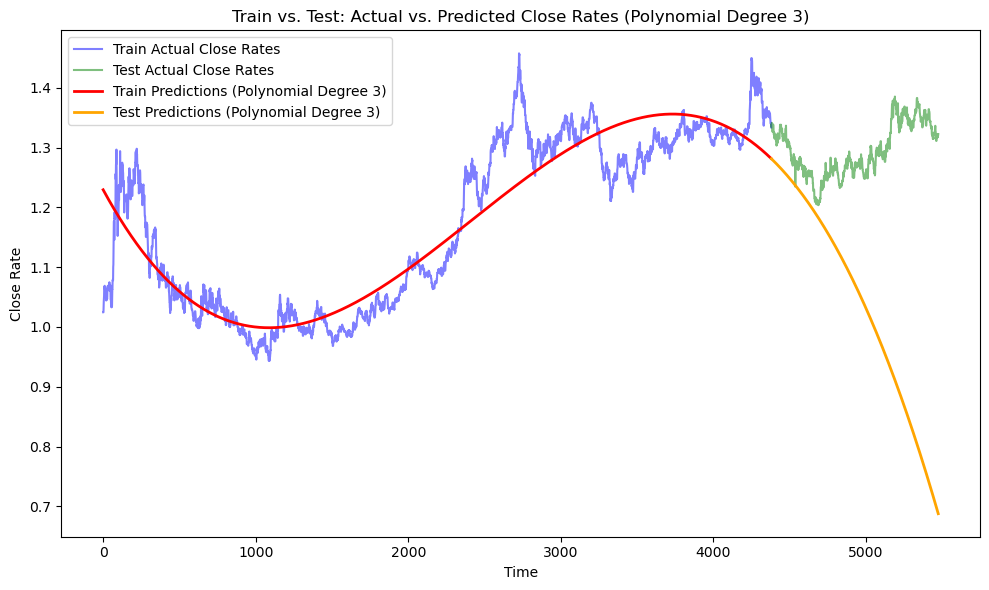

In [148]:
# Set the size of the plot
plt.figure(figsize=(10, 6), dpi=100)  # Adjust dpi for higher resolution

# Plot the actual Close rates for training data
# plt.scatter(X_train, y_train, label='Train Actual Close Rates', color='blue', alpha=0.5, edgecolor='k')
plt.plot(X_train, y_train, '-', label='Train Actual Close Rates', color='blue', alpha=0.5)


# Plot the actual Close rates for testing data
# plt.scatter(X_test, y_test, label='Test Actual Close Rates', color='green', alpha=0.5, edgecolor='k')
plt.plot(X_test, y_test, '-', label='Test Actual Close Rates', color='green', alpha=0.5)

# Plot the model's predictions for training data
plt.plot(X_train, predictions_train_poly3, label='Train Predictions (Polynomial Degree 3)', color='red', linewidth=2)

# Plot the model's predictions for testing data
plt.plot(X_test, predictions_test_poly3, label='Test Predictions (Polynomial Degree 3)', color='orange', linewidth=2)

plt.title('Train vs. Test: Actual vs. Predicted Close Rates (Polynomial Degree 3)')
plt.xlabel('Time')
plt.ylabel('Close Rate')
plt.legend()
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


<a class="anchor" id="nonlinear"></a>

### Non-linear (Time Series) model

Considering the above results, an attempt to explore the non-linear relationship between the variables **Time** and **Close** rates will be approached using Time Series Models.

In order to prepare the data to run a time series model, the following need to be addressed:
1. Checking NaNs in the dataset (handle them if yes)
2. Handling weekend and public holidays
3. Set the correct index for time series modeling
4. Checks for stationarity, seasonality and trends, outliers

In [149]:
#  1. Checking for NaNs / null values
missing = df.isna().sum()
missing

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Time         0
dtype: int64

Proceeding with the next steps as there are no missing values/ NaNs

2. Handling weekends and public holidays

The most often used approach for financial data, is to ignore these missing dates which will be handled well by models such as ARIMA that focus on the order of the data and not fixed intervals. However, for visualization purposes these values could be forward filled as required in one of the next steps.

3. In the current dataset, **Date** variable is a column. But to run a time series model, it will need to be set as the index

In [150]:
# Set 'Date' column as the DataFrame's index
df.set_index('Date', inplace=True)

In [151]:
df.head()

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,GBP=X,0.50441,0.5068,0.50396,0.50651,0.50651,0
2008-08-01,AUD=X,1.06430,1.0765,1.06390,1.07270,1.07270,1
2008-08-01,CAD=X,1.02340,1.0294,1.02290,1.02460,1.02460,2
2008-08-01,CHF=X,1.04800,1.0512,1.04640,1.05040,1.05040,3
2008-08-01,CNY=X,6.83600,6.8554,6.82100,6.84700,6.84700,4


We will only focus on one currency pair: **CAD=X**, we will filter out only data for this currency pair.

In [152]:
# Filter for 'CAD=X'
cad_df = df[df['Ticker'] == 'CAD=X'].copy()

We will now forward fill for visualization purposes

In [153]:
# Resampling to daily frequency with forward fill
cad_daily_ffill = cad_df.resample('D').ffill()

In [154]:
cad_daily_ffill.head(33)

,Ticker,Open,High,Low,Close,Adj Close,Time
Date,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-02,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-03,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14
2008-08-06,CAD=X,1.0426,1.0493,1.0400,1.0475,1.0475,20
2008-08-07,CAD=X,1.0476,1.0533,1.0449,1.0520,1.0520,26
2008-08-08,CAD=X,1.0519,1.0699,1.0519,1.0673,1.0673,34
2008-08-09,CAD=X,1.0519,1.0699,1.0519,1.0673,1.0673,34


Check that forward fill was successful

In [155]:
# check that forward fill was successful
cad_daily_ffill.shape

(5475, 7)

Plot for the full timeline - 2008 - 2023

In [156]:
# import necessary libraries for plotting
import plotly.express as px
from plotly.subplots import make_subplots

In [157]:
# Plotting the original 'Close' rates
fig = px.line(cad_df, x=cad_df.index, y="Close", title='Original Close Rates for CAD=X')
fig.update_layout(
    yaxis_title="Close Rate", 
    xaxis_title="Date",
    legend_title="",
    title="Original vs. Forward-Filled Close Rates for CAD=X"
)

# Adding the forward-filled 'Close' rates to the same plot for comparison
fig.add_scatter(x=cad_daily_ffill.index, y=cad_daily_ffill["Close"], mode='lines', name='Forward-Filled')

fig.show()

The trend shows an overall upward trend, with cyclical patterns. It is noticed that there are volatile fluctuations in the Close rates, with a period of low values between 2009-2015, and also highs in 2016 and 2020.

#### Exploring seasonality for CAD=X ticker

In order to explore the presence of seasonality, some plots would help visualize the data for each month in the year for the period between 2008-2023.

In [158]:
# Aggregate to monthly data by taking the mean 'Close' rate for each month
cad_monthly = cad_daily_ffill['Close'].resample('M').mean()

In [159]:
cad_monthly.shape

(180,)

In [160]:
cad_monthly.head()

Date
2008-08-31    1.053629
2008-09-30    1.056147
2008-10-31    1.178497
2008-11-30    1.221973
2008-12-31    1.232506
Freq: M, Name: Close, dtype: float64

In [161]:
cad_monthly.tail()

Date
2023-03-31    1.369052
2023-04-30    1.348217
2023-05-31    1.352207
2023-06-30    1.329600
2023-07-31    1.322140
Freq: M, Name: Close, dtype: float64

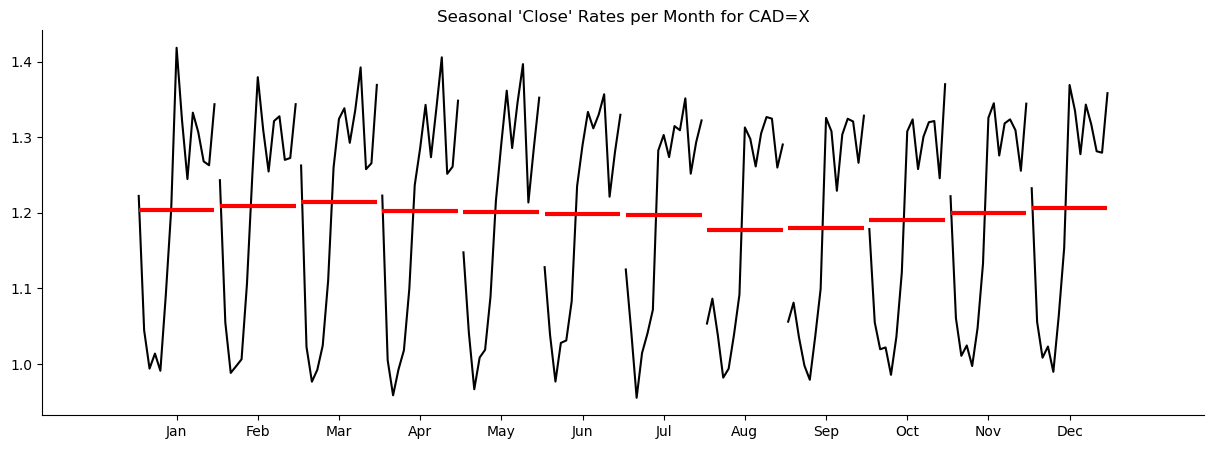

In [162]:
# seasonal plot to explore seasonality across the years
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Creating the seasonal plot for the monthly 'Close' rates
# Note: month_plot expects a Series with a PeriodIndex, so we convert the DateTimeIndex to PeriodIndex
cad_monthly_pindex = cad_monthly.to_period('M')

month_plot(cad_monthly_pindex, ax=plt.gca())

plt.title("Seasonal 'Close' Rates per Month for CAD=X")
sns.despine()
plt.show()

The seasonality plot above shows the mean in red, showing some variability in the Close rates between the months. However, as the numerical values are small, the next plot will be plotted for clarity.

In [163]:
# Ensure cad_monthly is ready with 'M' frequency, aggregated above
# Monthly average for 'Close' rates
monthly_mean = cad_monthly.groupby(cad_monthly.index.month).mean()

# Relative deviation from the overall mean
monthly_mean_diff = (monthly_mean - monthly_mean.mean()) / monthly_mean.mean()

# Month names in right order
month_names = pd.date_range(start='2000-01', freq='M', periods=12).month_name()

# Reorder the series to follow the month order
monthly_mean_diff.index = month_names

In [164]:
import plotly.express as px

# Convert Series to DataFrame for Plotly
monthly_mean_diff_df = monthly_mean_diff.reset_index()
monthly_mean_diff_df.columns = ['Month', 'Deviation']

# Creating a bar plot for the deviation
fig = px.bar(monthly_mean_diff_df, x='Month', y='Deviation', 
             title="Monthly Deviation from Mean Close Rate (%)", 
             labels={'Deviation': 'Deviation (%)', 'Month': 'Month'})

fig.update_layout(
    yaxis_title="Deviation (%)", 
    yaxis_tickformat='.2%',  # Formats the tick labels to percentage
    xaxis_title="Month",
    showlegend=False
)

fig.show()

Some variability is noticed where the rates see an increase in the first quarter of the year and reduce for the next 4 months. Then seeing a negative (<1) rates in Aug-Oct and going back up in Dec.

In [165]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(cad_monthly, model='additive')

In [166]:
# Adding the decomposition data to the DataFrame
cad_monthly_decomposed = pd.DataFrame({
    "Close": cad_monthly,
    "Trend": decomposition.trend,
    "Seasonal": decomposition.seasonal,
    "Residual": decomposition.resid
})

cad_monthly_decomposed.head(10)

,Close,Trend,Seasonal,Residual
Date,,,,
2008-08-31,1.053629,NaN,-0.008438,NaN
2008-09-30,1.056147,NaN,-0.007267,NaN
2008-10-31,1.178497,NaN,-0.004325,NaN
2008-11-30,1.221973,NaN,0.000766,NaN
2008-12-31,1.232506,NaN,0.005572,NaN
2009-01-31,1.222345,NaN,0.003111,NaN
2009-02-28,1.243143,1.175924,0.009784,0.057435
2009-03-31,1.262561,1.178342,0.013469,0.070751
2009-04-30,1.222773,1.174249,0.000454,0.048070


In this next plots, a look at the decomposed monthly data is visualized

In [167]:
# cad_monthly_decomposed contains your decomposed data with 'Close' rates and the components
fig = px.line(cad_monthly_decomposed, x=cad_monthly_decomposed.index, y="Close", title='Monthly "Close" Rates for CAD=X')
fig.update_layout(
    yaxis_title="Close Rate", 
    xaxis_title="Date",
    legend_title="", 
    title='Monthly "Close" Rates for CAD=X'
)
fig.show()

#### Plotting Trend, Seasonal, and Residual Components

In [168]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols, vertical_spacing=0.1)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=cad_monthly_decomposed.index, y=cad_monthly_decomposed[col], name=col),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=True, title_text="Decomposed Components: Trend, Seasonal, and Residual for CAD=X")
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Value", row=1, col=1)
fig.update_yaxes(title_text="Value", row=2, col=1)
fig.update_yaxes(title_text="Value", row=3, col=1)

fig.show()

From the plot, it is visible that:
- trend: similar to the earlier trend plot for the variability of the rates between 2008-2023.
- seasonal: we see the cyclical nature of the data in this metric
- residual: this displays the variability and the randomness (noise) of the highs and lows of Close rates.

4. Stationarity - explore stationarity of the data

In order to explore possible stationarity of the data, Dickey-Fuller test will be run.

In [169]:
from statsmodels.tsa.stattools import adfuller

In [170]:
time_series = cad_monthly_decomposed['Close'].dropna()

In [171]:
result = adfuller(time_series)

In [172]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.221105
p-value: 0.664451
Critical Values:
	1%: -3.469
	5%: -2.878
	10%: -2.576


**ADF Statistic** - The ADF statistic in this case is **-1.221105** suggesting non-stationarity.

**p-value** - The p-value is higher than 0.05 and stands at **0.664451**, indicating that the null hypothesis can't be rejected.

**Critical Values** - The critical values of 1%, 5% and 10% and the respective values would need to be below the thresholds, whcih is not the case from this test. Hence, the test does not show stationarity at any of the common significance level.

#### Dickey-Fuller test on the residuals

In order to check the stationarity, we will run the test on the residuals, which is where the variability is captured as per the above plots.

In [173]:
residuals = decomposition.resid.dropna()

# Perform Dickey-Fuller test on residuals
adf_test_results = adfuller(residuals)

# Print the results
print('ADF Statistic on Residuals: %f' % adf_test_results[0])
print('p-value on Residuals: %f' % adf_test_results[1])
print('Critical Values on Residuals:')
for key, value in adf_test_results[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic on Residuals: -7.175584
p-value on Residuals: 0.000000
Critical Values on Residuals:
	1%: -3.471
	5%: -2.880
	10%: -2.576


Running the Dickey-Fuller test on the residuals of seasonal decomposition is encouraging with the following results:


**ADF Statistic** - The ADF statistic in this case is **-7.175584**, the test statistic is far below the critical values for all common significance levels (1%, 5%, and 10%). This is a strong indication that the residuals of your model are stationary.

**p-value** - The p-value is effectivley **0.000** , indicating that the null hypothesis of non-stationarity can be rejected.

**Critical Values** - Since the ADF statistic is significantly less than even the 1% critical value, there is a strong evidence that the residuals are stationary at a 99% confidence level, which is much higher than the typical 95% level used in most analyses.

**Attempting to find stationarity in the years**

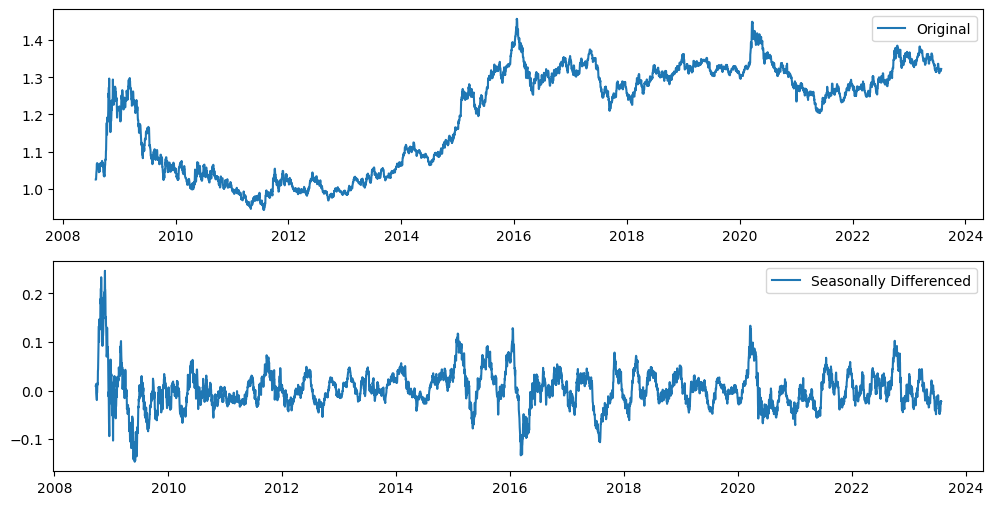

In [174]:
# Apply seasonal differencing
cad_daily_ffill['seasonal_difference'] = cad_daily_ffill['Close'].diff(52)

# Plot the original and seasonally differenced series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(cad_daily_ffill['Close'], label='Original')
plt.legend()
plt.subplot(212)
plt.plot(cad_daily_ffill['seasonal_difference'], label='Seasonally Differenced')
plt.legend()
plt.show()



In [175]:

# Drop NA values that were created as a result of differencing
seasonally_diff_series = cad_daily_ffill['seasonal_difference'].dropna()

# Run the ADF test on the seasonally differenced data
result = adfuller(seasonally_diff_series)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.288446
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


**Train Test split**

In [176]:
# Determine the split point for a 90-10 split
split_point = int(len(cad_df) * 0.9)

# Split the data into training and testing sets
cad_train = cad_df.iloc[:split_point]
cad_test = cad_df.iloc[split_point:]

***ACF, PACF plots to determine the parameter to use for the model***

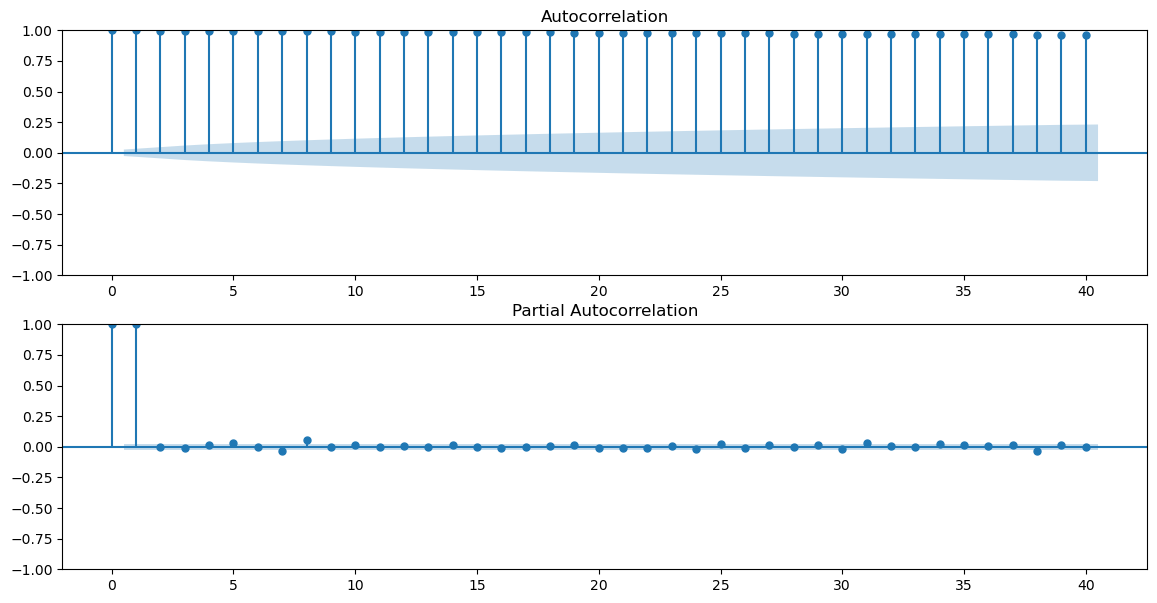

In [177]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(14,7))
plt.subplot(211)
plot_acf(cad_daily_ffill['Close'], ax=plt.gca(), lags=40)

# Plot PACF
plt.subplot(212)
plot_pacf(cad_daily_ffill['Close'], ax=plt.gca(), lags=40)

plt.show()

This is a plot after differencing to determine parameter values

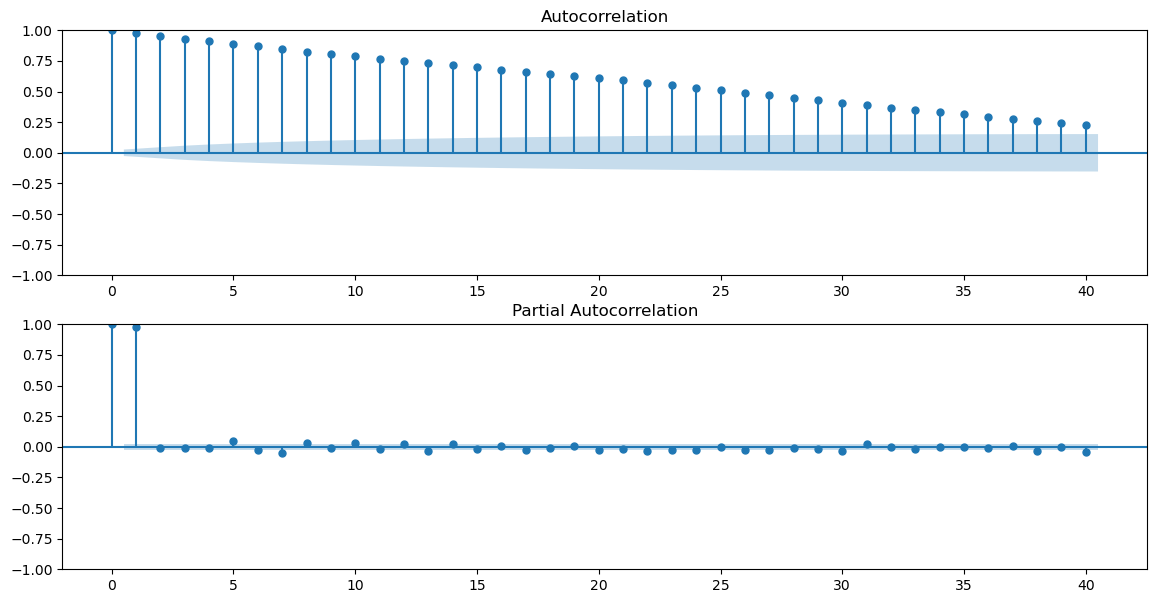

In [178]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'seasonal_difference' is the column with the seasonally differenced data
# and you've dropped any NaN values that resulted from the differencing

# Plot ACF
plt.figure(figsize=(14,7))
plt.subplot(211)
plot_acf(cad_daily_ffill['seasonal_difference'].dropna(), ax=plt.gca(), lags=40)

# Plot PACF
plt.subplot(212)
plot_pacf(cad_daily_ffill['seasonal_difference'].dropna(), ax=plt.gca(), lags=40)

plt.show()


In [179]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [180]:
cad_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3514 entries, 2008-08-01 to 2022-01-27
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     3514 non-null   object 
 1   Open       3514 non-null   float64
 2   High       3514 non-null   float64
 3   Low        3514 non-null   float64
 4   Close      3514 non-null   float64
 5   Adj Close  3514 non-null   float64
 6   Time       3514 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 219.6+ KB


In [181]:
# Set the frequency of the datetime index to 'D' for daily frequency
cad_train = cad_train.asfreq('D')

In [182]:
# Model parameters
p = 5  # Replace with the order suggested by the PACF plot
d = 0  # Since manually differenced data is being used
q = 1  # Replace with the order suggested by the ACF plot
P = 1  # Seasonal AR component
D = 0  # Set to 0 because we already differenced the data seasonally
Q = 1  # Seasonal MA component
m = 52  # The seasonal period; 52 for weekly seasonality

# Instantiate and fit the SARIMA model
sarima_model = SARIMAX(cad_train['Close'], 
                       order=(p, d, q), 
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit(maxiter=5000)


In [183]:
# Print out the summary
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 4928
Model:             SARIMAX(5, 0, 1)x(1, 0, 1, 52)   Log Likelihood               12255.365
Date:                            Tue, 26 Mar 2024   AIC                         -24492.730
Time:                                    02:52:20   BIC                         -24434.311
Sample:                                08-01-2008   HQIC                        -24472.228
                                     - 01-27-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6407      0.144      4.438      0.000       0.358       0.924
ar.L2          0.3298      0.141   

Focus on a year to simplify the time series - attempting this for the year 2022 as it is the most recent year with the full year's data

In [184]:

# Choose a split date
split_date = "2022-01-01"

# Split the data into training and testing sets
train = cad_daily_ffill.loc[cad_daily_ffill.index <= split_date, "seasonal_difference"].dropna()
test = cad_daily_ffill.loc[cad_daily_ffill.index > split_date, "seasonal_difference"]

# Print the shapes of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)


Training set shape: (4850,)
Testing set shape: (573,)


In [185]:
cad_daily_ffill.head()

,Ticker,Open,High,Low,Close,Adj Close,Time,seasonal_difference
Date,,,,,,,,
2008-08-01,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2,NaN
2008-08-02,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2,NaN
2008-08-03,CAD=X,1.0234,1.0294,1.0229,1.0246,1.0246,2,NaN
2008-08-04,CAD=X,1.0280,1.0368,1.0262,1.0364,1.0364,8,NaN
2008-08-05,CAD=X,1.0363,1.0448,1.0363,1.0426,1.0426,14,NaN


In [186]:
# Define the train-test split dates for the year 2022
split_date = "2022-10-31"

# Split the data into training and testing sets for the year 2022
train_2022 = cad_daily_ffill.loc[(cad_daily_ffill.index.year == 2022) & (cad_daily_ffill.index <= split_date), "seasonal_difference"].dropna()
test_2022 = cad_daily_ffill.loc[(cad_daily_ffill.index.year == 2022) & (cad_daily_ffill.index > split_date), "seasonal_difference"]

# Define the SARIMA parameters
p = 7  # Adjust based on visual analysis
d = 0  # Since data was manually differenced
q = 1  # Adjust based on analysis
P = 1  # Seasonal AR component
D = 0  # Set to 0 because we already differenced the data seasonally
Q = 1  # Seasonal MA component
m = 52  # The seasonal period; use 52 for weekly seasonality

# Fit the SARIMA model to the training data for 2022
sarima_model_2022 = SARIMAX(train_2022, order=(p, d, q), seasonal_order=(P, D, Q, m), enforce_stationarity=False, enforce_invertibility=False)
sarima_results_2022 = sarima_model_2022.fit(maxiter=200)

In [187]:
# Print a summary for the 2022 model
print("Model Summary for 2022:")
print(sarima_results_2022.summary())

Model Summary for 2022:
                                     SARIMAX Results                                      
Dep. Variable:                seasonal_difference   No. Observations:                  304
Model:             SARIMAX(7, 0, 1)x(1, 0, 1, 52)   Log Likelihood                 898.516
Date:                            Tue, 26 Mar 2024   AIC                          -1775.032
Time:                                    02:52:35   BIC                          -1736.518
Sample:                                01-01-2022   HQIC                         -1759.522
                                     - 10-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6449      0.517      1.247      0.213      -0.369       1.659
ar.L2      

In [188]:
# Fit a simplified SARIMA model with reduced AR order
sarima_model_2022_simplified = SARIMAX(train_2022, order=(3, 0, 1), seasonal_order=(1, 0, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
sarima_results_2022_simplified = sarima_model_2022_simplified.fit()

# Print a summary for the simplified 2022 model
print("Simplified Model Summary for 2022:")
print(sarima_results_2022_simplified.summary())


Simplified Model Summary for 2022:
                                     SARIMAX Results                                      
Dep. Variable:                seasonal_difference   No. Observations:                  304
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 52)   Log Likelihood                 913.019
Date:                            Tue, 26 Mar 2024   AIC                          -1812.038
Time:                                    02:52:47   BIC                          -1787.415
Sample:                                01-01-2022   HQIC                         -1802.127
                                     - 10-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6170      1.327      0.465      0.642      -1.985       3.219


In [189]:
# Fit a more simplified SARIMA model
sarima_model_2022_more_simplified = SARIMAX(train_2022, order=(1, 0, 0), seasonal_order=(1, 0, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
sarima_results_2022_more_simplified = sarima_model_2022_more_simplified.fit()

# Print a summary for the more simplified 2022 model
print("More Simplified Model Summary for 2022:")
print(sarima_results_2022_more_simplified.summary())


More Simplified Model Summary for 2022:
                                      SARIMAX Results                                       
Dep. Variable:                  seasonal_difference   No. Observations:                  304
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 52)   Log Likelihood                 920.729
Date:                              Tue, 26 Mar 2024   AIC                          -1833.458
Time:                                      02:52:58   BIC                          -1819.357
Sample:                                  01-01-2022   HQIC                         -1827.783
                                       - 10-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9972      0.009    115.536      0.000    

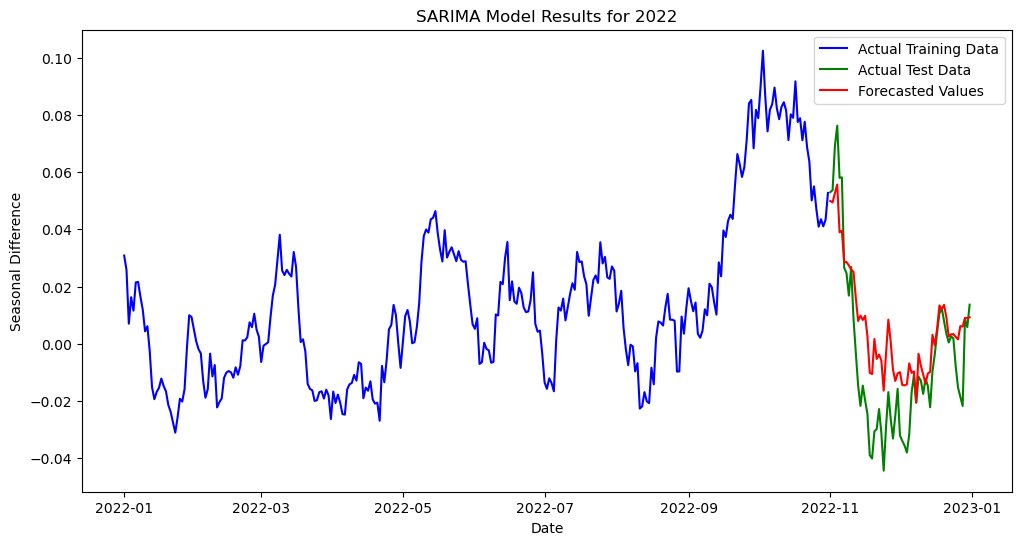

In [190]:
# Get the fitted values
fitted_values = sarima_results_2022_more_simplified.fittedvalues

# Forecast for the test set
forecast = sarima_results_2022_more_simplified.get_forecast(steps=len(test_2022))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_2022.index, train_2022, label='Actual Training Data', color='blue')
plt.plot(test_2022.index, test_2022, label='Actual Test Data', color='green')

# Plot the forecasted values
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Values', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.title('SARIMA Model Results for 2022')
plt.legend()

# Show the plot
plt.show()


In [191]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add traces for the training data, test data, and forecasted values
fig.add_trace(go.Scatter(x=train_2022.index, y=train_2022, mode='lines', name='Actual Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_2022.index, y=test_2022, mode='lines', name='Actual Test Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=forecast_mean.index, y=forecast_mean, mode='lines', name='Forecasted Values', line=dict(color='red')))

# Update layout with titles and labels
fig.update_layout(
    yaxis_title='Seasonal Difference',
    xaxis_title='Date',
    title='SARIMA Model Results for 2022',
    hovermode='x'
)

# Show the plot
fig.show()


In [194]:
# Define the train-test split dates for the year 2021
split_date = "2021-10-31"

# Split the data into training and testing sets for the year 2022
train_2021 = cad_daily_ffill.loc[(cad_daily_ffill.index.year == 2021) & (cad_daily_ffill.index <= split_date), "seasonal_difference"].dropna()
test_2021 = cad_daily_ffill.loc[(cad_daily_ffill.index.year == 2021) & (cad_daily_ffill.index > split_date), "seasonal_difference"]

# Define the SARIMA parameters
p = 7  # Adjust based on visual analysis
d = 0  # Since data was manually differenced
q = 1  # Adjust based on analysis
P = 1  # Seasonal AR component
D = 0  # Set to 0 because we already differenced the data seasonally
Q = 1  # Seasonal MA component
m = 52  # The seasonal period; use 52 for weekly seasonality

# Fit the SARIMA model to the training data for 2021
sarima_model_2021 = SARIMAX(train_2021, order=(p, d, q), seasonal_order=(P, D, Q, m), enforce_stationarity=False, enforce_invertibility=False)
sarima_results_2021 = sarima_model_2021.fit(maxiter=200)

In [195]:
# Print a summary for the 2021 model
print("Model Summary for 2021:")
print(sarima_results_2021.summary())

Model Summary for 2021:
                                     SARIMAX Results                                      
Dep. Variable:                seasonal_difference   No. Observations:                  304
Model:             SARIMAX(7, 0, 1)x(1, 0, 1, 52)   Log Likelihood                 935.585
Date:                            Tue, 26 Mar 2024   AIC                          -1849.171
Time:                                    03:02:50   BIC                          -1810.657
Sample:                                01-01-2021   HQIC                         -1833.661
                                     - 10-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6662      0.806      0.826      0.409      -0.914       2.246
ar.L2      

In [196]:
# Fit a simplified SARIMA model with reduced AR order
sarima_model_2021_simplified = SARIMAX(train_2021, order=(3, 0, 1), seasonal_order=(1, 0, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
sarima_results_2021_simplified = sarima_model_2021_simplified.fit()

# Print a summary for the simplified 2021 model
print("Simplified Model Summary for 2021:")
print(sarima_results_2021_simplified.summary())


Simplified Model Summary for 2021:
                                     SARIMAX Results                                      
Dep. Variable:                seasonal_difference   No. Observations:                  304
Model:             SARIMAX(3, 0, 1)x(1, 0, 1, 52)   Log Likelihood                 925.105
Date:                            Tue, 26 Mar 2024   AIC                          -1836.210
Time:                                    03:03:50   BIC                          -1811.588
Sample:                                01-01-2021   HQIC                         -1826.300
                                     - 10-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6575      0.253      2.598      0.009       0.162       1.153


In [201]:
# Fit a more simplified SARIMA model
sarima_model_2021_more_simplified = SARIMAX(train_2021, order=(1, 0, 0), seasonal_order=(1, 0, 1, 52), enforce_stationarity=False, enforce_invertibility=False)
sarima_results_2021_more_simplified = sarima_model_2021_more_simplified.fit()

# Print a summary for the more simplified 2021 model
print("More Simplified Model Summary for 2021:")
print(sarima_results_2021_more_simplified.summary())


More Simplified Model Summary for 2021:
                                      SARIMAX Results                                       
Dep. Variable:                  seasonal_difference   No. Observations:                  304
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 52)   Log Likelihood                 933.675
Date:                              Tue, 26 Mar 2024   AIC                          -1859.350
Time:                                      03:07:45   BIC                          -1845.248
Sample:                                  01-01-2021   HQIC                         -1853.675
                                       - 10-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9830      0.013     74.803      0.000    

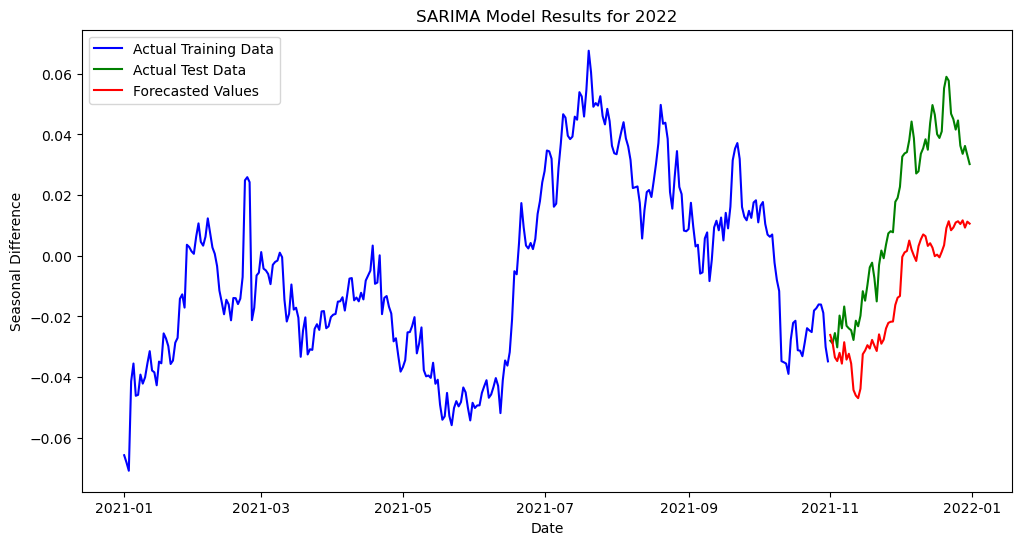

In [202]:
# Get the fitted values
fitted_values = sarima_results_2021_more_simplified.fittedvalues

# Forecast for the test set
forecast = sarima_results_2021_more_simplified.get_forecast(steps=len(test_2021))
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the actual values
plt.figure(figsize=(12, 6))
plt.plot(train_2021.index, train_2021, label='Actual Training Data', color='blue')
plt.plot(test_2021.index, test_2021, label='Actual Test Data', color='green')

# Plot the forecasted values
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Values', color='red')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Seasonal Difference')
plt.title('SARIMA Model Results for 2022')
plt.legend()

# Show the plot
plt.show()

In [203]:
# Create a Plotly figure
fig = go.Figure()

# Add traces for the training data, test data, and forecasted values
fig.add_trace(go.Scatter(x=train_2021.index, y=train_2021, mode='lines', name='Actual Training Data', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test_2021.index, y=test_2021, mode='lines', name='Actual Test Data', line=dict(color='green')))
fig.add_trace(go.Scatter(x=forecast_mean.index, y=forecast_mean, mode='lines', name='Forecasted Values', line=dict(color='red')))

# Update layout with titles and labels
fig.update_layout(
    yaxis_title='Seasonal Difference',
    xaxis_title='Date',
    title='SARIMA Model Results for 2021',
    hovermode='x'
)

# Show the plot
fig.show()


In [192]:
# Export the CAD=X data to continue non-linear models in the next notebook

In [193]:
# Export the CAD=X currency pair DataFrame to a CSV file
cad_df.to_csv('cad_x_currency_data.csv', index=True)

### To be continued....